# Практична робота 2. Аналіз даних. Робота даними csv.
## Global YouTube Statistics 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. Прочитайте CSV файл (використовуйте метод read_csv).

In [2]:
df = pd.read_csv("Global_YouTube_Statistics.csv", encoding="ISO-8859-1")

2. Виведіть перші п'ять рядків (використовується метод head).

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
# подивилася на колонки
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
# перейменувала ще колонки у стилі "snake_case", аби було зручніше звертатися до них
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'gross_tertiary_education_enrollment_(%)', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

3. Виведіть розміри датасету (використовуйте метод shape).

In [6]:
df.shape

(995, 28)

4. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum). 
Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий. 

In [7]:
df.isna().sum()

rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [8]:
#df = df.fillna("NaN") 

# не зовсім розумію як нам в 5 завданні замінити пропущені значення середнім, якщо ми їх зараз заповнимо
# тому закоментувала цей код

5. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float. 

In [9]:
df = df.fillna(df.mean()) # перетворювати на числовий тип додатково не бачу сенсу, 
                          # бо замінюється і так в числових(якщо треба було б перетворити, я б використала .astype(float) або .astype(int))
                          
# АЛЕ ж ми не можемо замінити середнім у стовпчиках нечислового типу

C:\Users\nasty\AppData\Local\Temp\ipykernel_12296\3550653508.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean()) # перетворювати на числовий тип додатково не бачу сенсу,


In [10]:
# тому у стовпчиках category, сountry, abbreviation, channel_type 
columns = ['category', 'country', 'abbreviation', 'channel_type']
query = {col: "NaN" for col in columns}
df = df.fillna(query)

6. Ще раз перевірте кількість пропусків. 

In [11]:
# завдання 6
df.isna().sum()

rank                                       0
youtuber                                   0
subscribers                                0
video_views                                0
category                                   0
title                                      0
uploads                                    0
country                                    0
abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              5
created_date                               0
gross_tert

7. Перевірте, скільки унікальних країн представлено у колонці "Country" 

In [12]:
print("Кількість унікальних країн у колонці 'Country':", df["country"].nunique()-1) # додала -1, аби не враховували значення NaN як країну

Кількість унікальних країн у колонці 'Country': 49


8. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist')

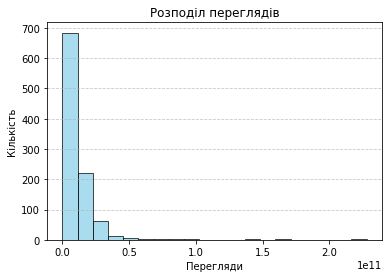

In [13]:
df['video_views'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Розподіл переглядів')
plt.xlabel('Перегляди')
plt.ylabel('Кількість')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

9. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean) 

In [14]:
print("Максимальна кількість переглядів:", df['video_views'].max())
print("Мінімальна кількість переглядів:", df['video_views'].min())
print("Середня кількість переглядів:", df['video_views'].mean())

Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


10. Знайдіть країну, де найбільше відео було завантажено на YouTube 

In [15]:
country_video_counts = df.groupby('country')['uploads'].count()
country_video_counts

country
Afghanistan               1
Andorra                   1
Argentina                13
Australia                 9
Bangladesh                1
Barbados                  1
Brazil                   62
Canada                   15
Chile                     3
China                     1
Colombia                 11
Cuba                      1
Ecuador                   2
Egypt                     2
El Salvador               1
Finland                   1
France                    5
Germany                   6
India                   168
Indonesia                28
Iraq                      2
Italy                     2
Japan                     5
Jordan                    3
Kuwait                    1
Latvia                    1
Malaysia                  1
Mexico                   33
Morocco                   1
NaN                     122
Netherlands               3
Pakistan                  6
Peru                      1
Philippines              12
Russia                   16
Samoa       

In [16]:
country = country_video_counts.idxmax()
print("Країна з найбільшою кількістю відео на YouTube:", country)

Країна з найбільшою кількістю відео на YouTube: United States


In [17]:
video_count = country_video_counts.max()
print("Кількість відео в цій країні:", video_count)

Кількість відео в цій країні: 313


11. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads. 

In [18]:
max_uploads_index = df['uploads'].idxmax()
min_uploads_index = df['uploads'].idxmin()

video_with_max_uploads = df.loc[max_uploads_index, 'title']
video_with_min_uploads = df.loc[min_uploads_index, 'title']

print("Відео з найбільшою кількістю завантажень:", video_with_max_uploads)
print("Відео з найменшою кількістю завантажень:", video_with_min_uploads)

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music


12. Збережіть файл. Прізвище_ПР_2_1.ipynb 